### Amazon Prime Exploratory Data Analysis

##### About Dataset
Amazon Prime is another one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_prime_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [5]:
df.shape

(9668, 12)

### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### Key Points
* There are total 9668 records and 12 features
* There are missing values on the following features:
    * director - 2082
    * cast - 1233
    * country - 8996
    * date_added 9513
    * rating - 337
* There is no duplicate values present in the data.

### Data Cleaning

Dropping the column which has more than 80% Null values. 

In [9]:
percentage = ((df.isnull().sum()/ df.shape[0])*100).round(2)
percentage

show_id          0.00
type             0.00
title            0.00
director        21.53
cast            12.75
country         93.05
date_added      98.40
release_year     0.00
rating           3.49
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

Looks like features like 'country' and 'date_added' has more than 80% of null values so we can drop it.

In [10]:
df.drop(['country', 'date_added'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df.loc[:, 'director'] = df['director'].fillna('Unavailable')
df.loc[:, 'cast'] = df['cast'].fillna('Unavailable')
df.loc[:, 'rating'] = df['rating'].fillna('Unavailable')

In [13]:
df.head()

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,Unavailable,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,Unavailable,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,Unavailable,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,Unavailable,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Looks like we are done with the cleaning part.

##### Lets Explore the key features of the data

In [15]:
df['type'].unique() # There are 2 attribute in the feature 'type'

array(['Movie', 'TV Show'], dtype=object)

In [16]:
df['director'].nunique()

5775

In [17]:
df['rating'].unique()

array(['Unavailable', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR',
       '16+', 'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA',
       'G', 'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_',
       'ALL_AGES', 'NOT_RATE'], dtype=object)

In [18]:
df['rating'] = df['rating'].where(df['rating'] != 'NOT_RATE', 'Unavailable')

In [19]:
df['rating'].unique()

array(['Unavailable', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR',
       '16+', 'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA',
       'G', 'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_',
       'ALL_AGES'], dtype=object)

In [20]:
df['rating'] = df['rating'].where(df['rating'] != 'AGES_16_', '16+')
df['rating'] = df['rating'].where(df['rating'] != 'AGES_18_', '18+')
df['rating'] = df['rating'].where(df['rating'] != '16', '16+')
df['rating'] = df['rating'].where(df['rating'] != 'UNRATED', 'Unavailable')

In [21]:
df['rating'].unique().sort()

In [22]:
df['rating'].unique() # Looks good for now

array(['Unavailable', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR',
       '16+', 'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA',
       'G', 'PG', 'NC-17', 'ALL_AGES'], dtype=object)

In [23]:
df['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927], dtype=int64)

In [24]:
df['duration'].unique()
# Here we have duration in 'minutes' as well as in 'Seasons'.

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

So far so Good 😊

#### Let's Visualise the data

In [25]:
df.shape

(9668, 10)

In [26]:
dfv = df.copy()

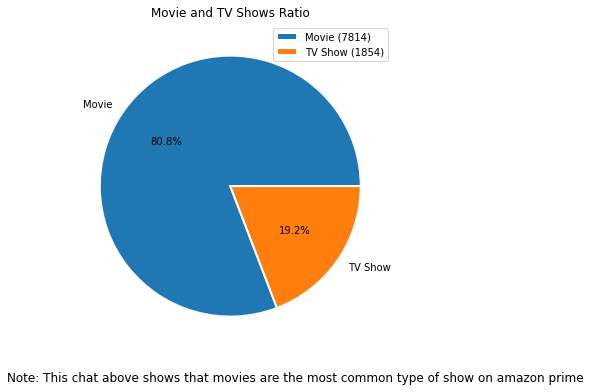

In [27]:
df_pie = dfv['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
note_text = "Note: This chat above shows that movies are the most common type of show on amazon prime"
plt.text(0.5, -1.5, note_text, fontsize=12, ha='center')
plt.show()

In [28]:
df['release_year'].value_counts()

2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: release_year, Length: 100, dtype: int64

#### Let's export the cleaned data an visualize the data using the tool called "Tableau"

In [37]:
df.to_csv('Cleaned Dataset.csv', index =False)

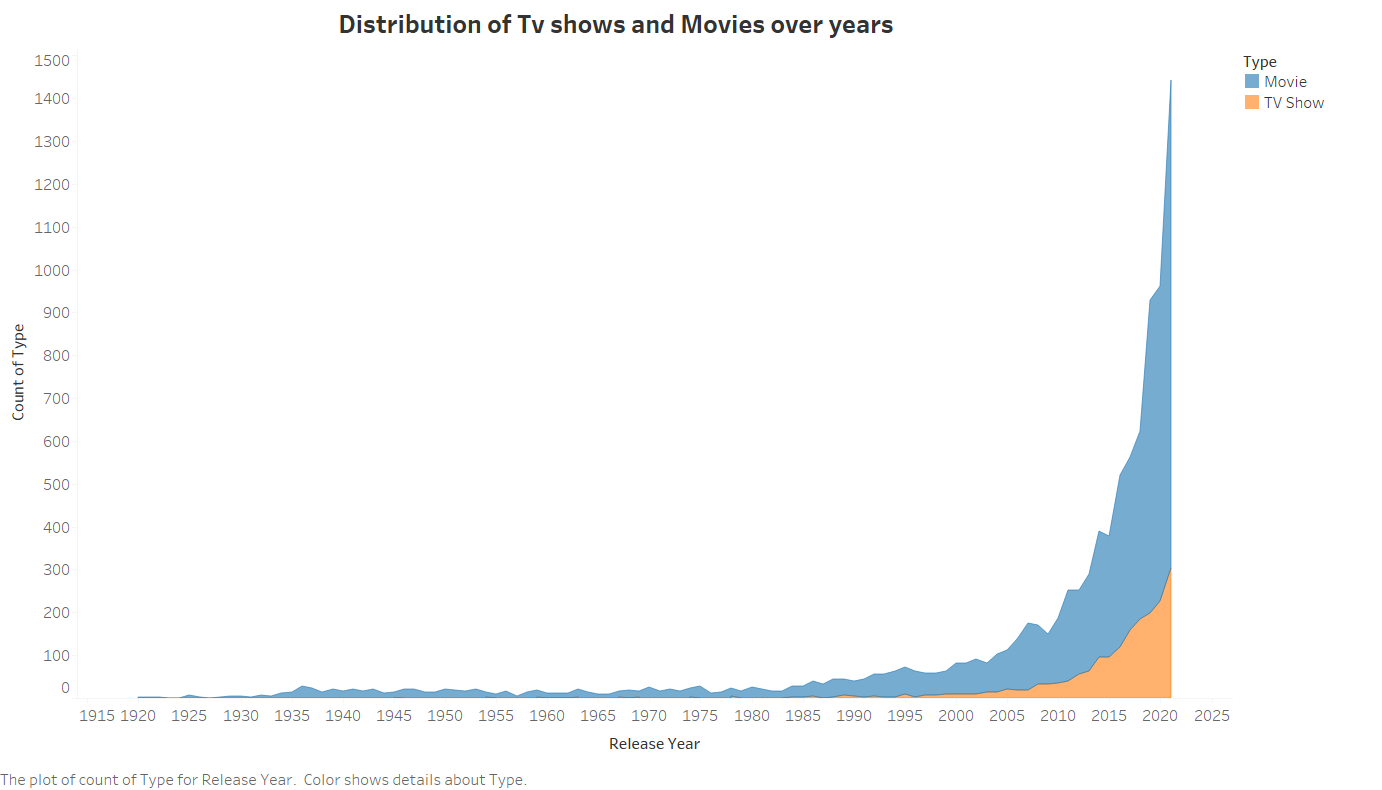

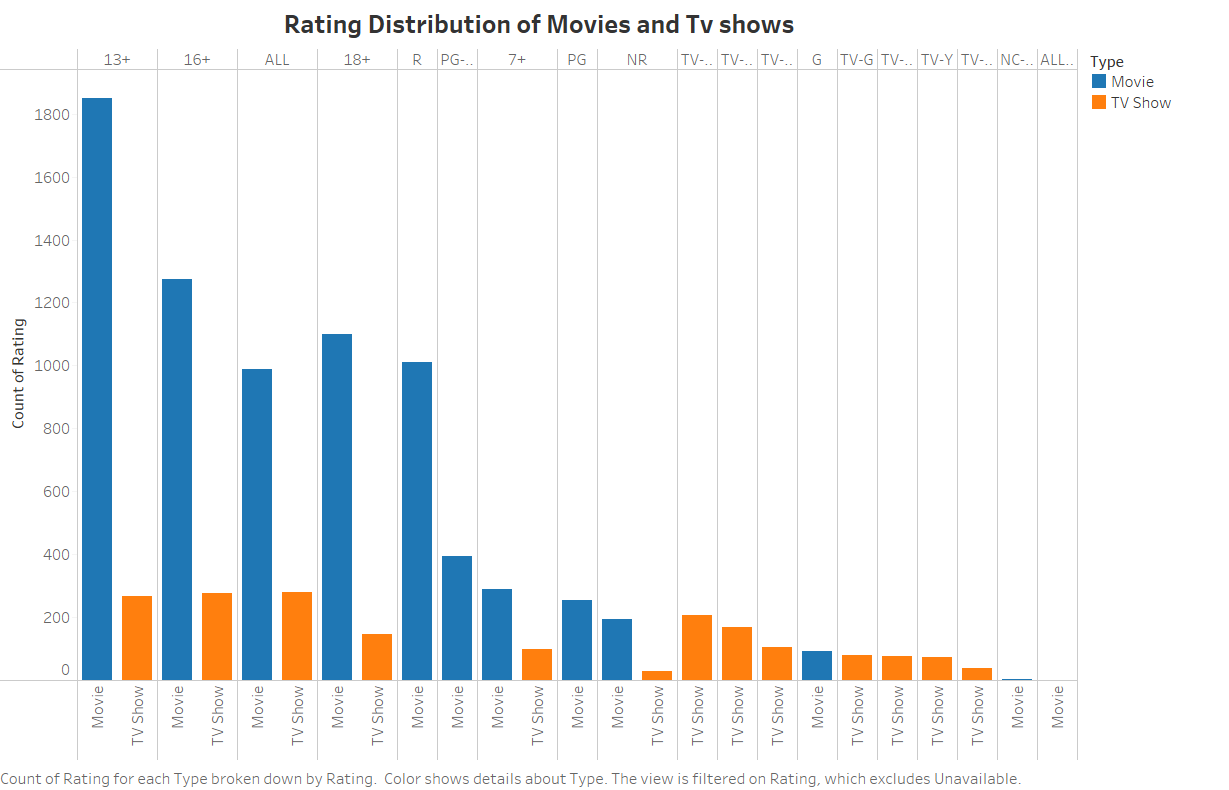

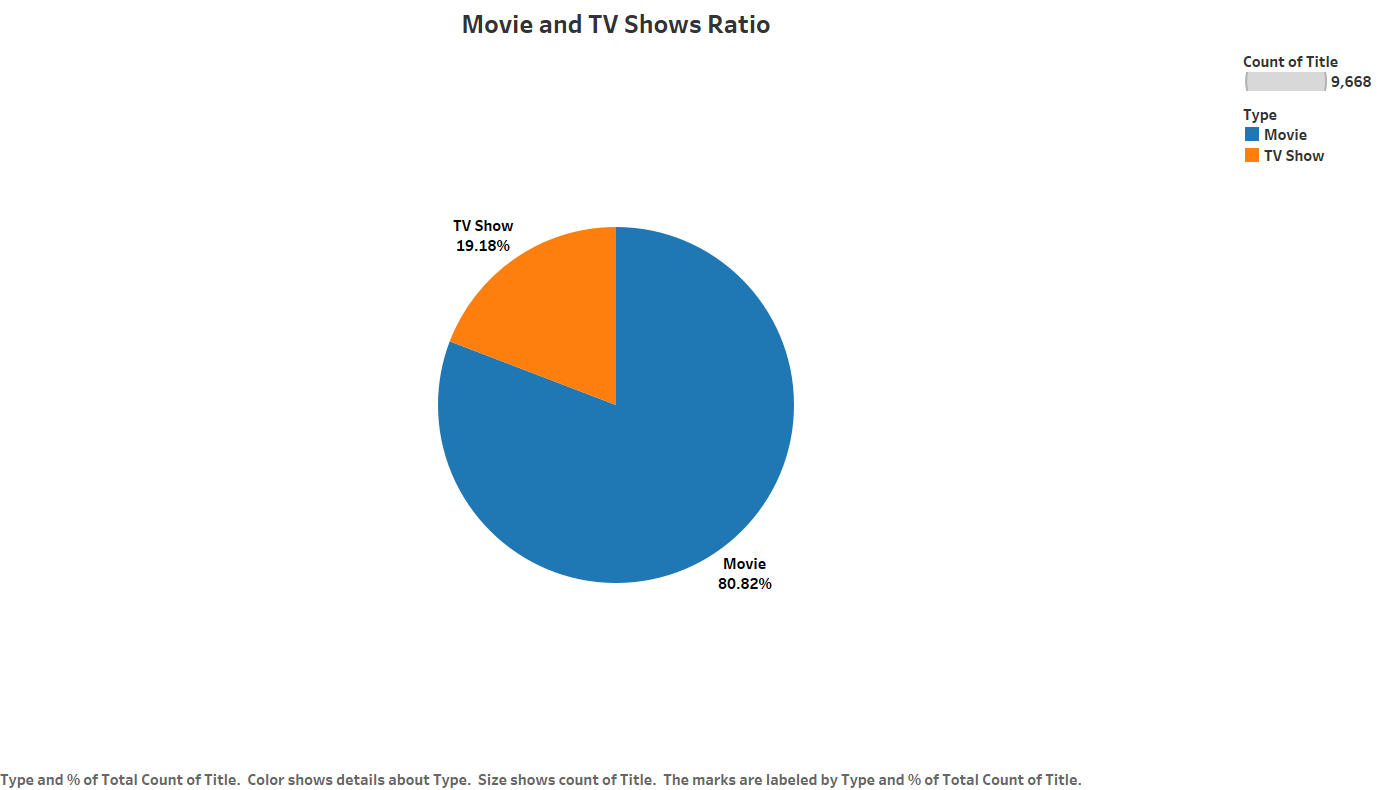